## Assignment 2.5 - Visual Weather Systems CNN - ClimateWins Machine Learning

### The Following Script Contains:
#### 1. Importing Libraries
#### 2. Loading and Pre-Processing Weather Images
#### 3. Compiling and Running CNN Model
#### 4. Results
#### 5. Bonus Task 

### 1. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### 2. Loading and Pre-Processing Weather Images

In [2]:
#download the weather images and put them in a directory
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins\02 Data\Original Data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Compiling and Running CNN Model

In [5]:
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

C:\Users\kenzy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.4540 - loss: 0.1490 - val_accuracy: 0.6607 - val_loss: 0.1055
Epoch 2/16
 1/28 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.6875 - loss: 0.0940

C:\Users\kenzy\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6875 - loss: 0.0940 - val_accuracy: 0.6339 - val_loss: 0.1127
Epoch 3/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.7211 - loss: 0.0931 - val_accuracy: 0.7500 - val_loss: 0.0957
Epoch 4/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8125 - loss: 0.0593 - val_accuracy: 0.7455 - val_loss: 0.0993
Epoch 5/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.7837 - loss: 0.0818 - val_accuracy: 0.8214 - val_loss: 0.0653
Epoch 6/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7500 - loss: 0.0758 - val_accuracy: 0.7857 - val_loss: 0.0810
Epoch 7/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.8277 - loss: 0.0660 - val_accuracy: 0.6830 - val_loss: 0.0991
Epoch 8/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7188 - loss: 0.0857 - val_accuracy: 0.6830 - val_loss: 0.0997
Epoch 9/16
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.8151 - loss: 0.0612 - val_accuracy: 0.8259 - val_loss

### 4. Results

In [6]:
for key, value in model.history.history.items(): print(f"{key}:{len(value)}")

accuracy:16
loss:16
val_accuracy:16
val_loss:16


In [7]:
# Check the lengths of all keys in the history
history_data = model.history.history
lengths = [len(v) for v in history_data.values()]

# If lengths are inconsistent, trim them to the smallest length (if needed)
min_length = min(lengths)
for key in history_data:
    history_data[key] = history_data[key][:min_length]

# Now you can create the DataFrame
results = pd.DataFrame(history_data)

In [8]:
results = pd.DataFrame(model.history.history)

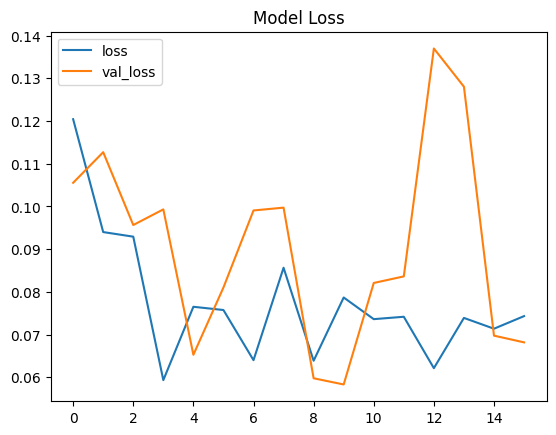

In [9]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

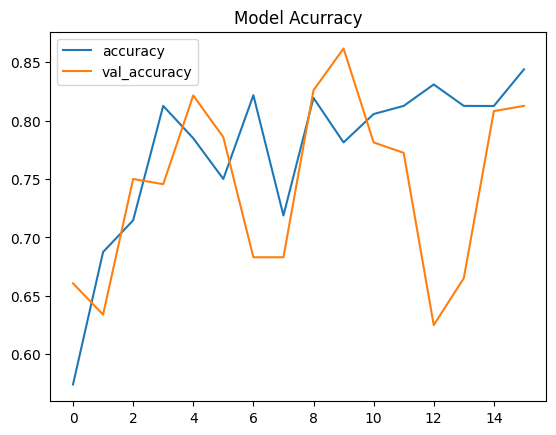

In [10]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [11]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.84375, Val_Accuracy: 0.8125
Loss: 0.0743294358253479, Val_Loss: 0.06818949431180954


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


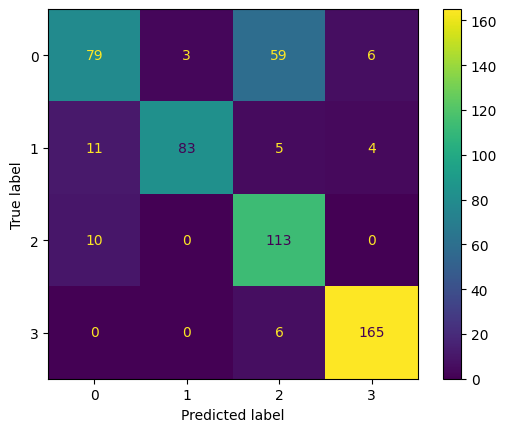

In [12]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [13]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


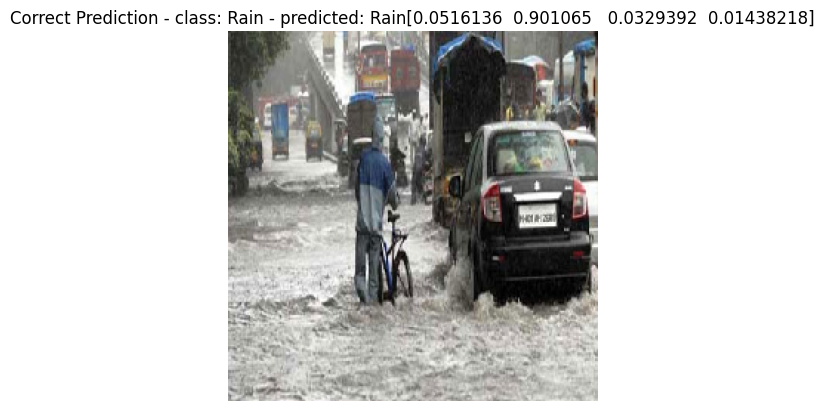

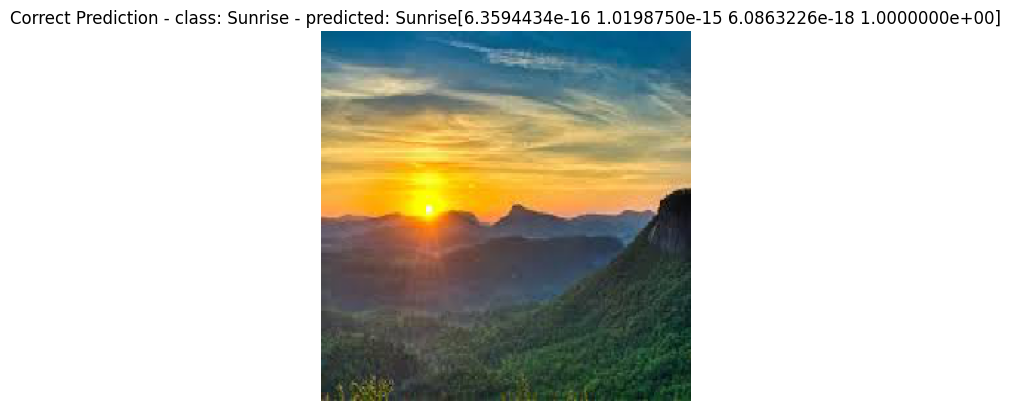

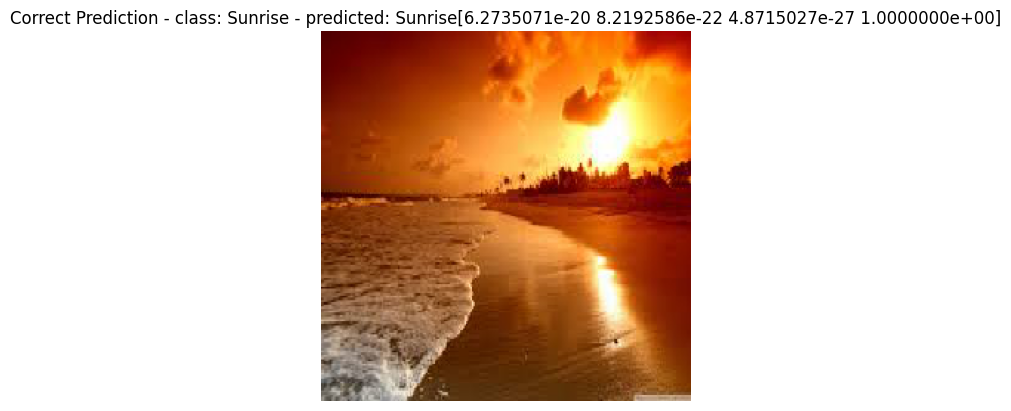

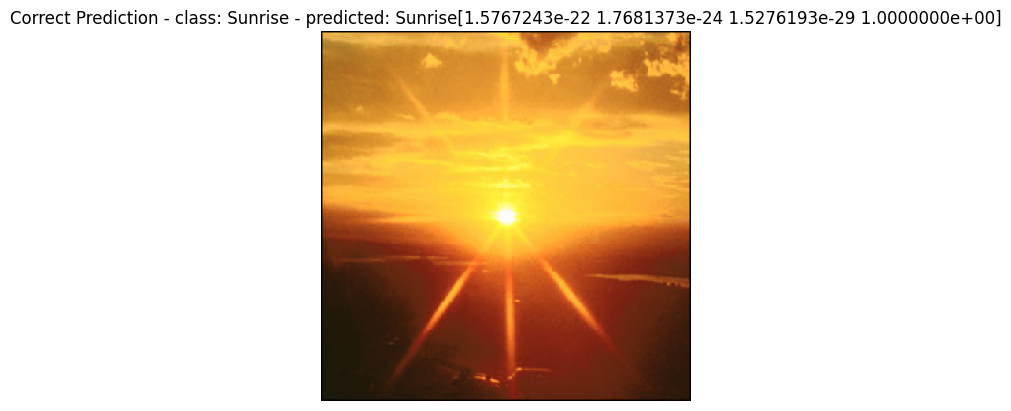

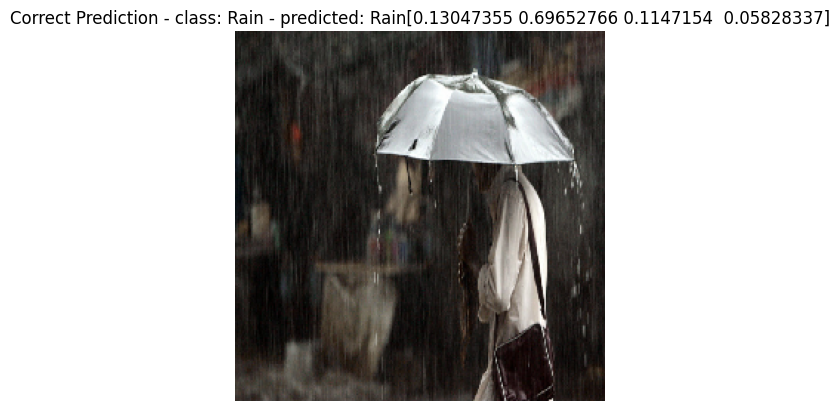

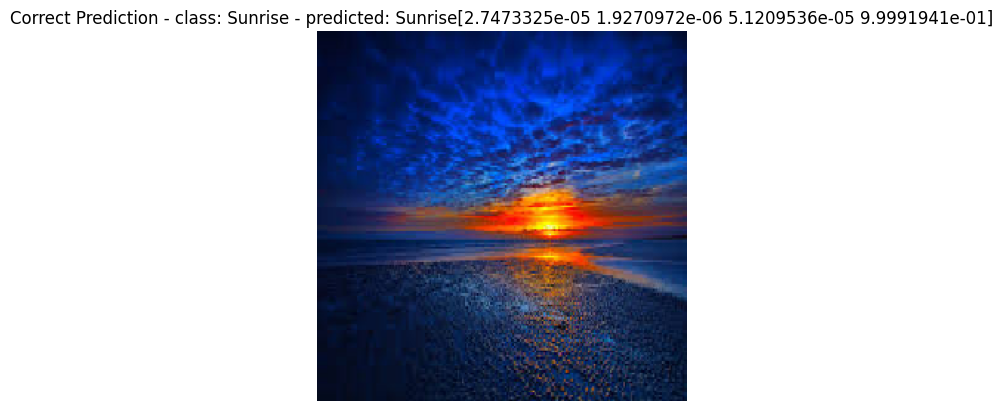

In [14]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


C:\Users\kenzy\AppData\Local\Temp\ipykernel_17916\3625117412.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(k)


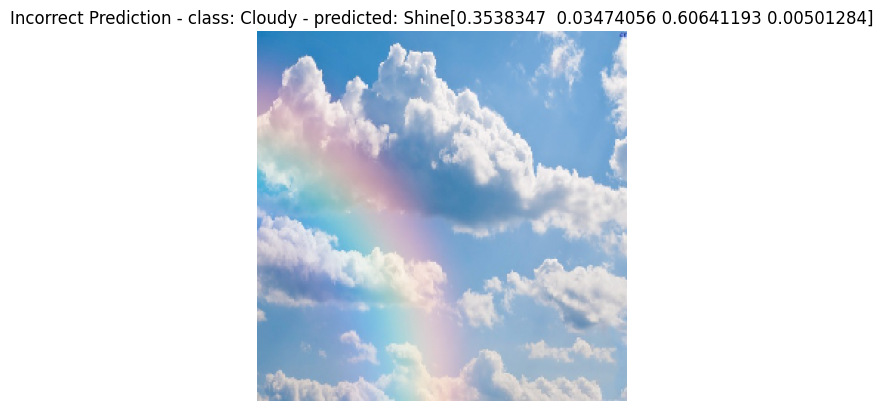

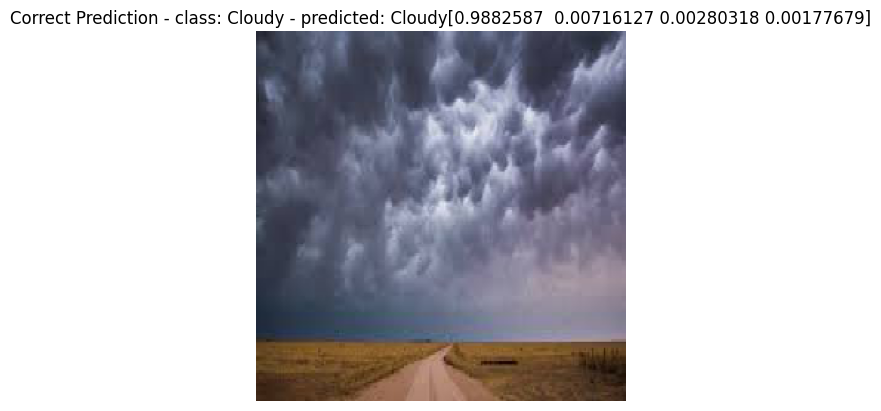

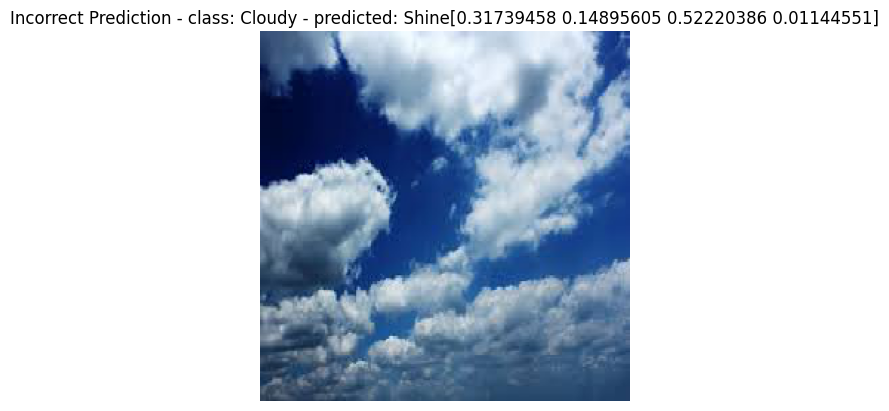

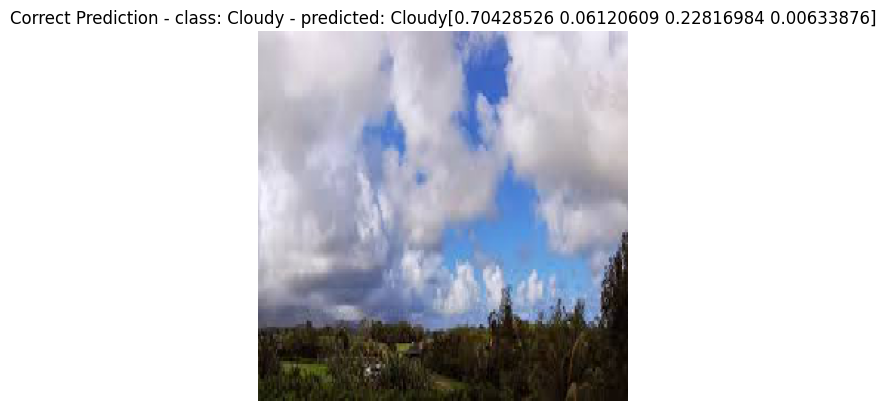

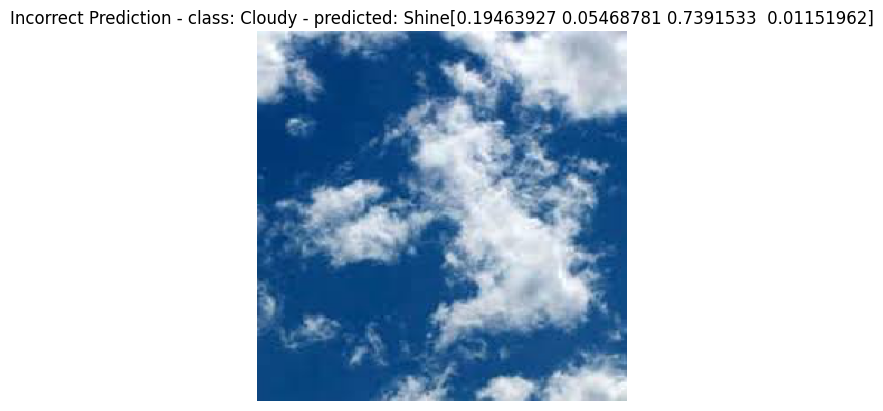

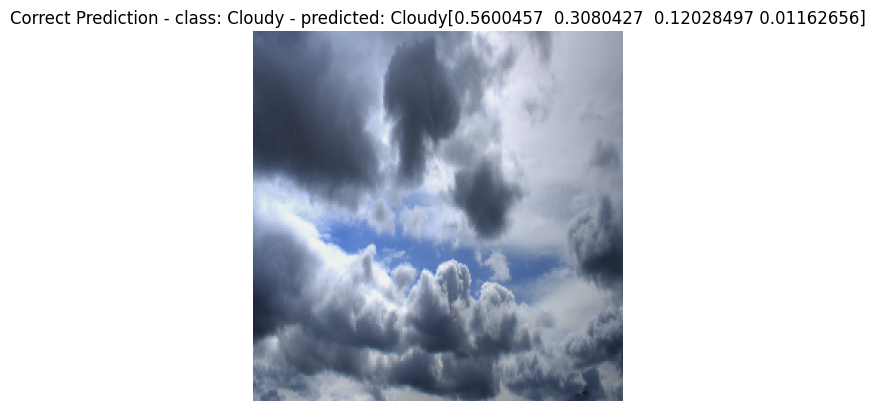

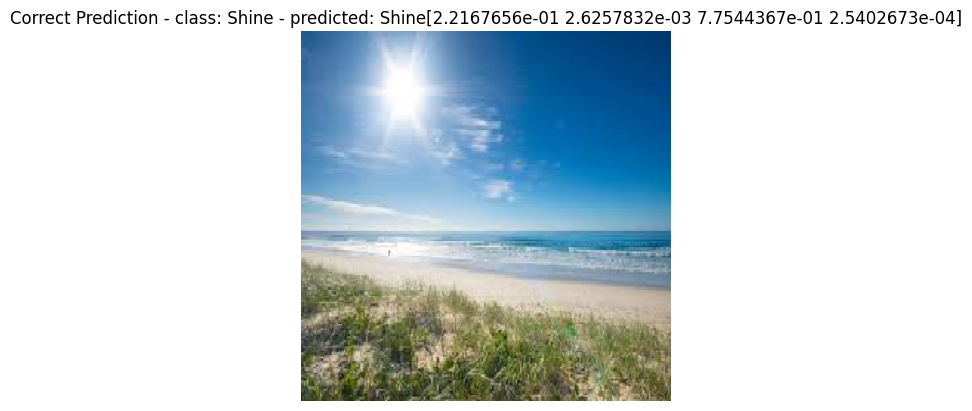

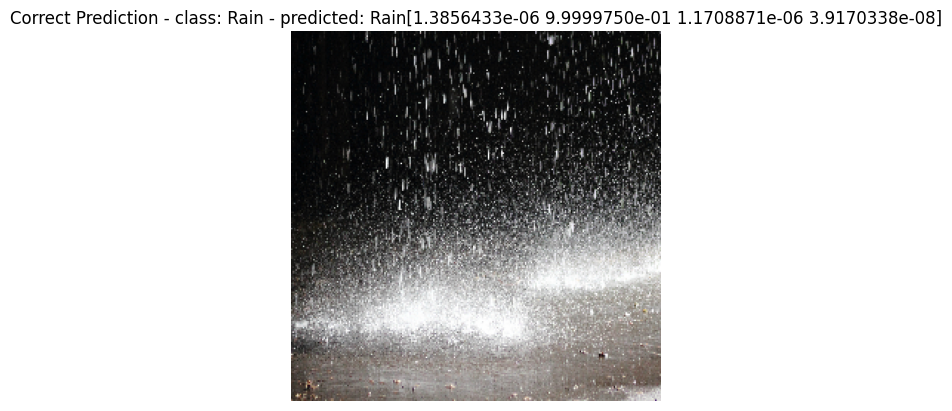

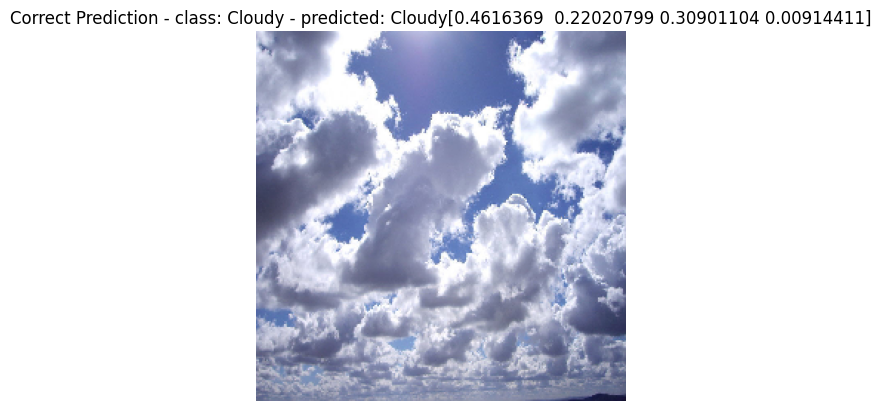

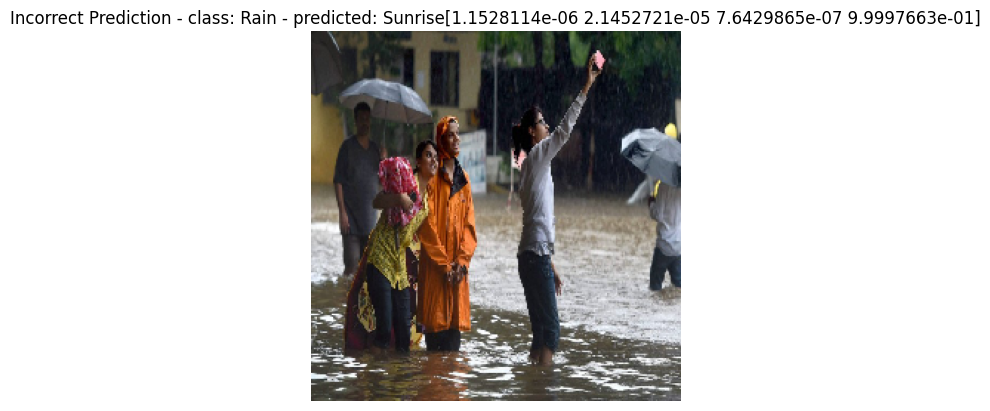

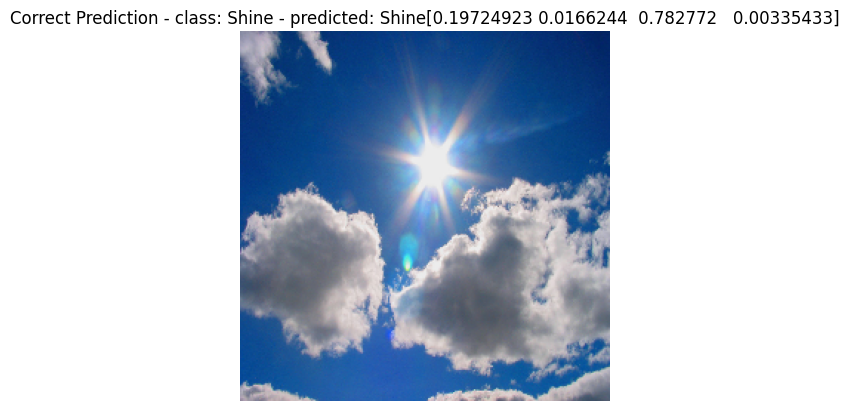

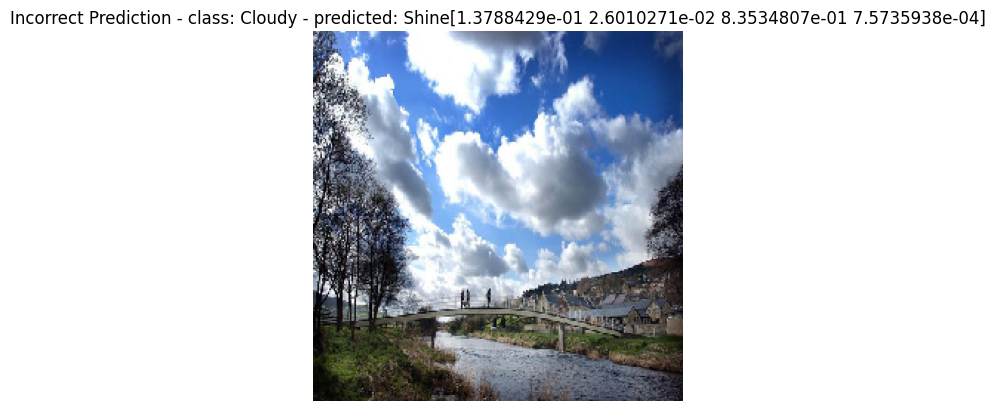

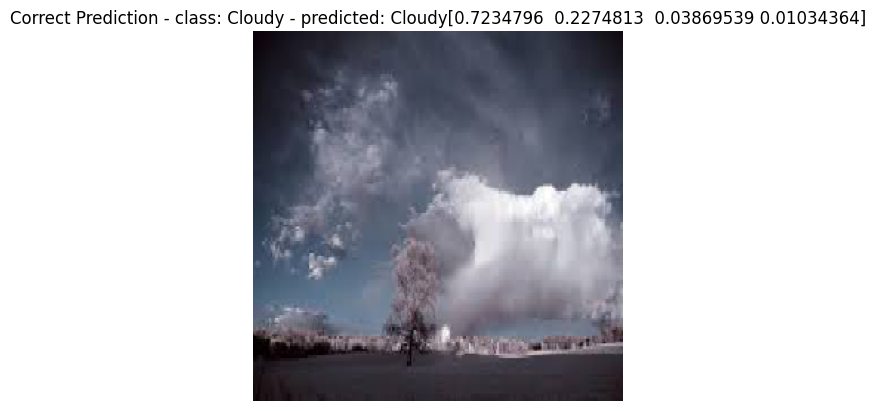

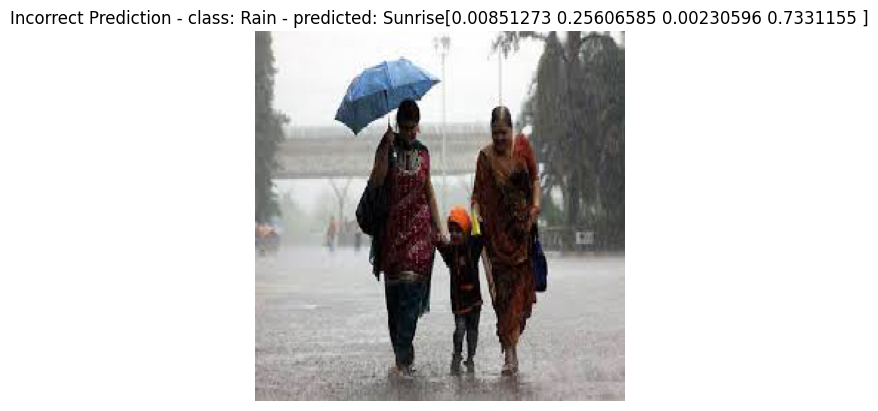

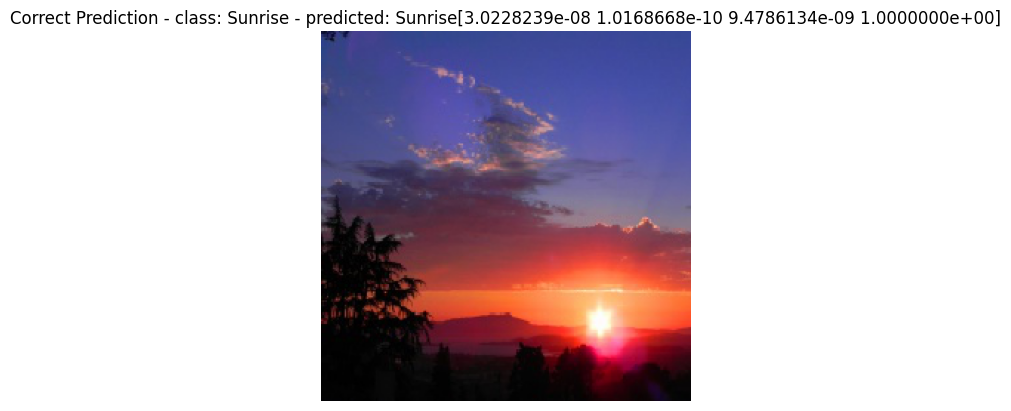

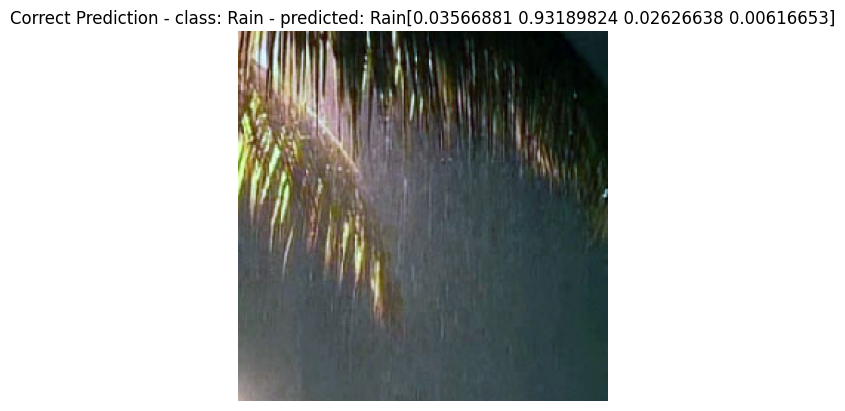

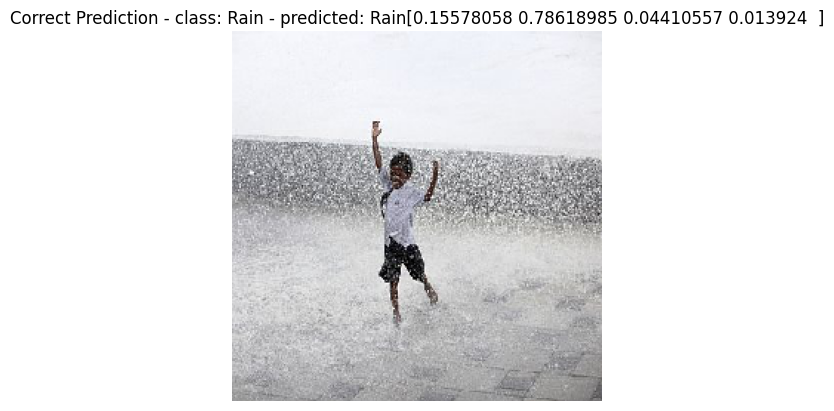

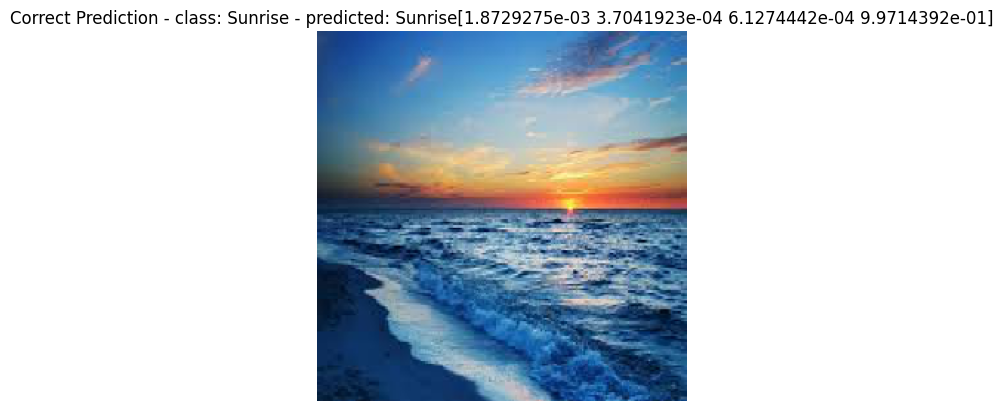

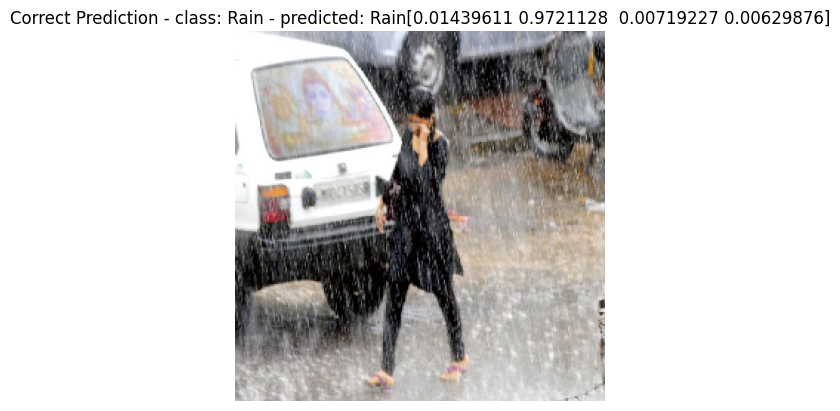

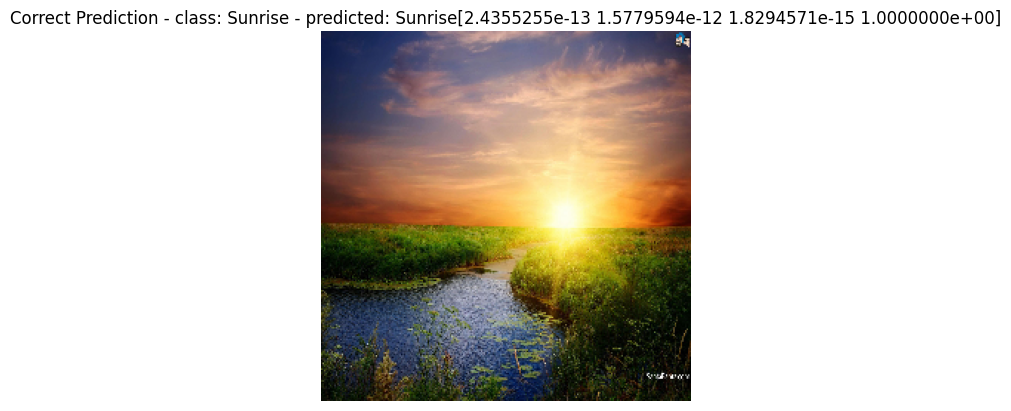

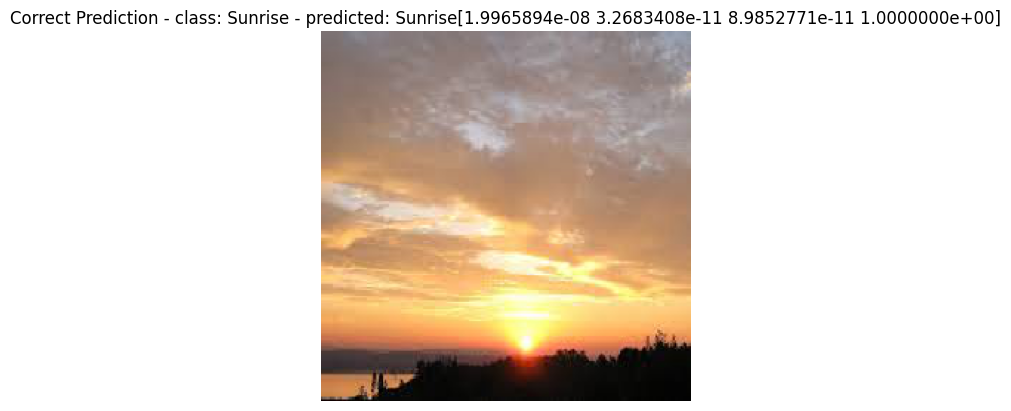

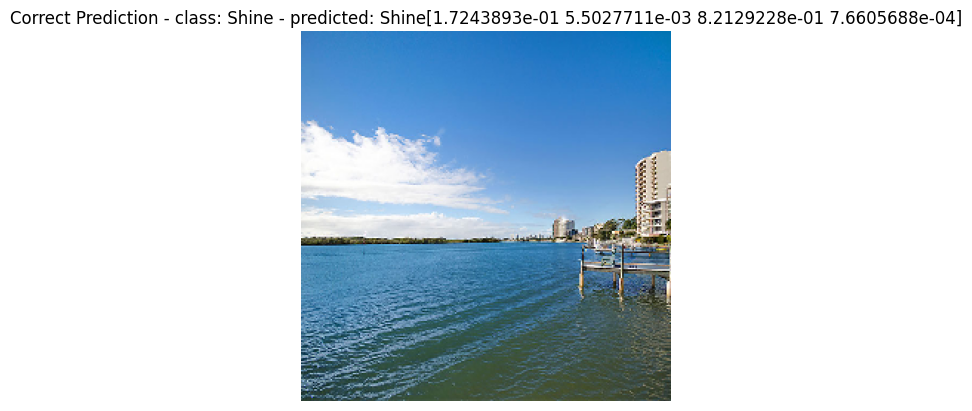

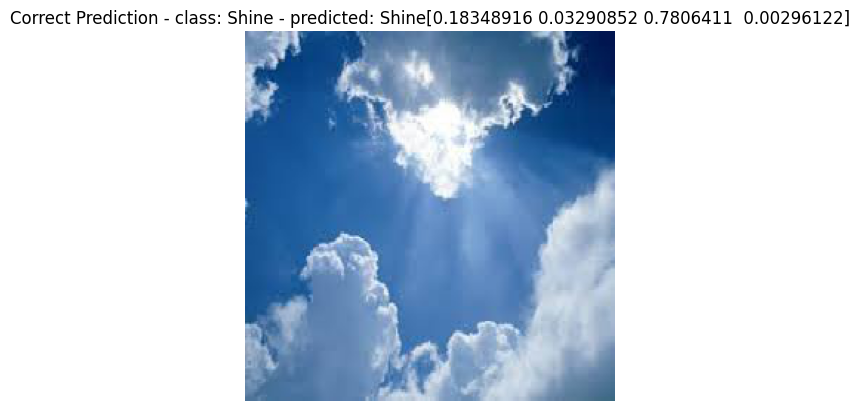

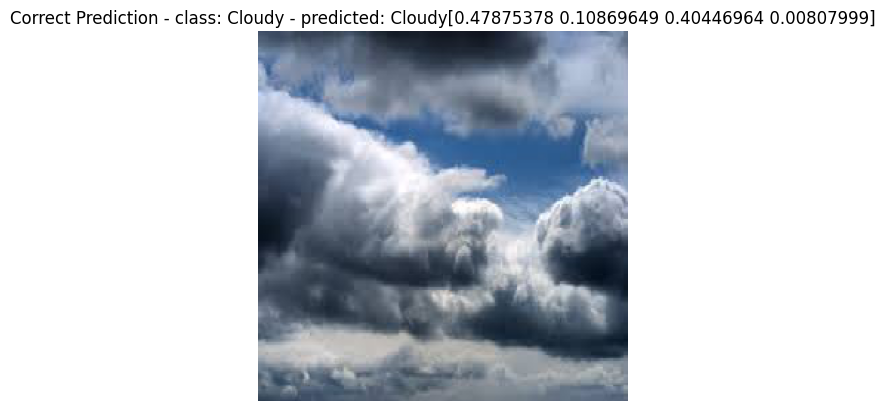

In [15]:
predict_one(model, 24) #<--you can show multiple pictures with this command. Just fill in the number you want to see.